                                            Sales Analysis

In [ ]:
import pandas as pd
import os

1. Merge the 12 months of sales data into a single csv file 

In [ ]:
df= pd.read_csv('./Sales_Data/Sales_April_2019.csv')

files =[file for file in os.listdir('./Sales_Data/')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)

In [ ]:
all_data = pd.read_csv(r'C:\Users\my lenovo pc\Desktop\Sales analysis\all data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data
Drop rows NAN 

In [ ]:
nan_df= all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Find 'Or' and delete it.

In [ ]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

Convert Columns to the Correct type

In [ ]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # Make float

### Augument Data with additional Columns

Task2: Add Month Column

In [ ]:
all_data['Month']= all_data['Order Date'].str[0:2]
all_data['Month']= all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Task 3: Add a Sales column

In [ ]:
all_data['Sales']= all_data['Quantity Ordered']* all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


Task.4: Add a city columns.

In [ ]:
# let's use .apply() Method

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]


all_data['City']= all_data['Purchase Address'].apply(lambda x:f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


Question 1 : What was the best month for sales? How much was earned that month?

In [ ]:
results = all_data.groupby("Month").sum()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb


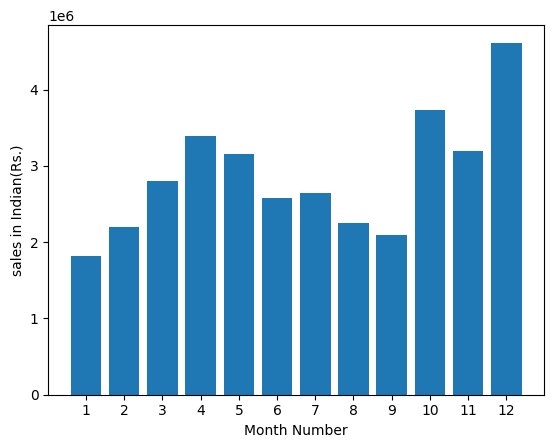

In [ ]:
months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('sales in Indian(Rs.)')
plt.xlabel('Month Number')
plt.show()

#### Question.2 What city had the highest number of sales?

In [20]:
results = all_data.groupby("City").sum()

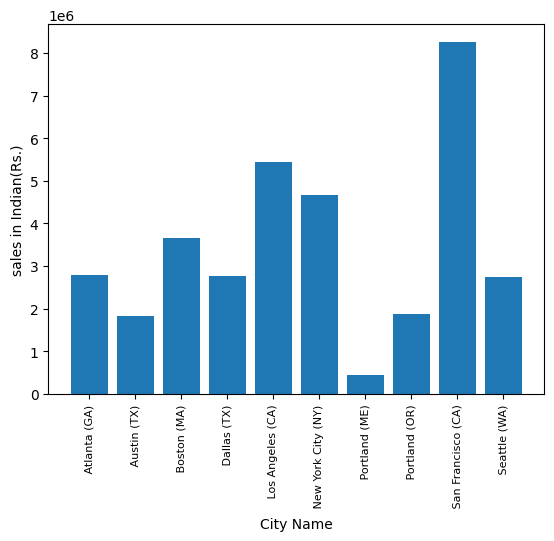

In [21]:
import matplotlib.pyplot as plt
cities = [city for city, df in all_data.groupby('City')]
plt.bar(cities,results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('sales in Indian(Rs.)')
plt.xlabel('City Name')
plt.show()

#### Q.3 What time should we display advertisements to maximize likelihood of customer's buying products?